In [77]:
import numpy as np

In this first part, we just prepare our data (mnist) for training and testing

In [78]:
import tensorflow.keras
from tensorflow.keras.datasets import mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# Reshape
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).T
X_test = X_test.reshape(X_test.shape[0], num_pixels).T
Y_train = Y_train.reshape(Y_train.shape[0], 1)
Y_test = Y_test.reshape(Y_test.shape[0], 1)

# Change type
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
Y_train = Y_train.astype('float32')
Y_test = Y_test.astype('float32')

# split ?
X_train  = X_train / 255
X_test  = X_test / 255


We want to have a binary classification: digit 5 is classified 1 and all the other digits are classified 0

In [79]:
Y_new = np.zeros(Y_train.shape)
Y_new[np.where(Y_train==5.0)[0]] = 1
Y_train = Y_new

In [80]:
Y_new = np.zeros(Y_test.shape)
Y_new[np.where(Y_test==5.0)[0]] = 1
Y_test = Y_new

In [81]:
Y_train = Y_train.T
Y_test = Y_test.T

In [82]:
m = X_train.shape[1] # number of examples

Now, we shuffle the training set

In [83]:
np.random.seed(138)
shuffle_index = np.random.permutation(m)
X_train, Y_train = X_train[:,shuffle_index], Y_train[:,shuffle_index]

Display one image and corresponding label

y[3]=[0.]


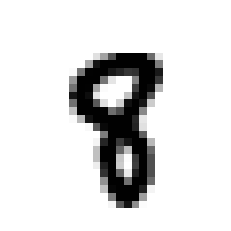

In [84]:
import matplotlib
import matplotlib.pyplot as plt

i = 3
print('y[{}]={}'.format(i, Y_train[:,i]))
plt.imshow(X_train[:,i].reshape(28,28), cmap = matplotlib.cm.binary)
plt.axis("off")
plt.show()

Let start our work: creating a neural network

First, we just use a single neuron.

1.

In [85]:
def sigmoid(z):
  return 1 / (1 + np.e**-z)

2.

In [86]:
# def neuron(X, W, b):
#   z = 0
#   for i in range(1, len(X)):
#     z += (W[i] * X[i])
#   return z + b

def neuron(X, W, b):
  return np.dot(W, X) + b

In [87]:
W = np.random.uniform(-0.5, 0.5, len(X_train))
b = np.random.uniform(-0.1, 0.1)

In [88]:
z = neuron(X_train, W, b)
z

array([ 0.02540991,  0.45289627, -2.5392937 , ..., -3.7630704 ,
       -2.15876374, -2.00039968])

In [89]:
# sigma 𝝈(z)
Ŷ = sigmoid(z)
Ŷ

array([0.50635214, 0.61132763, 0.07314904, ..., 0.02268577, 0.10351512,
       0.11916096])

3.

In [90]:
# loss
def cross_entropy(Y, Ŷ):
  return np.sum(-Y * np.log(Ŷ) - (1 - Y) * np.log(1 - Ŷ)) # L

In [91]:
L = cross_entropy(Y_train, Ŷ)
L

28638.393198766287

1. ...

- compute the gradient ▽L
- compute $\frac{∂L}{∂b}$
- $w = w-\eta▽L$
- $b = b-\eta\frac{∂L}{∂b}$

2.

In [92]:
def test(Y, Ŷ, X, W, b):
  eta = 1
  for i in range(300):
    W = W - eta * ((1 / Y.size) * np.matmul((Ŷ - Y), X.T))
    b = b - eta * ((1 / Y.size) * np.sum(Ŷ - Y))
    Ŷ = sigmoid(neuron(X, W, b))
    if i % 10 == 0:
      print('epoch', i, "loss", cross_entropy(Y, Ŷ))
  return W, b

W, b = test(Y_train, Ŷ, X_train, W, b)


epoch 0 loss 26395.11833245758
epoch 10 loss 12892.017530164583
epoch 20 loss 9535.631399486507
epoch 30 loss 8631.38443932357
epoch 40 loss 8172.50039247791
epoch 50 loss 7857.652685590598
epoch 60 loss 7624.561881396278
epoch 70 loss 7442.863087369747
epoch 80 loss 7295.750456183701
epoch 90 loss 7173.146594948905
epoch 100 loss 7068.633296392733
epoch 110 loss 6977.922499326758
epoch 120 loss 6898.034453351386
epoch 130 loss 6826.829072904363
epoch 140 loss 6762.725509560414
epoch 150 loss 6704.527420019385
epoch 160 loss 6651.31024006495
epoch 170 loss 6602.346220729082
epoch 180 loss 6557.053224534884
epoch 190 loss 6514.958908848143
epoch 200 loss 6475.6751336042325
epoch 210 loss 6438.879321770765
epoch 220 loss 6404.300647564852
epoch 230 loss 6371.709641031213
epoch 240 loss 6340.910252268666
epoch 250 loss 6311.733714613157
epoch 260 loss 6284.033742656492
epoch 270 loss 6257.682733907749
epoch 280 loss 6232.568734316671
epoch 290 loss 6208.592991725273


3.

In [93]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [99]:
# predict
Ŷ = sigmoid(neuron(X_train, W, b))

cm = confusion_matrix(Y_test, Ŷ)
print(cm)

print("{:.2%}".format(accuracy_score(Y_test, Ŷ)))

ValueError: Classification metrics can't handle a mix of binary and continuous-multioutput targets